In [4]:
%pip install torch numpy matplotlib

     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ----------- ---------------------------- 30.7/104.6 kB ? eta -:--:--
     --------------------- --------------- 61.4/104.6 kB 656.4 kB/s eta 0:00:01
     ------------------------------------ 104.6/104.6 kB 857.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/204.2 MB 1.7 MB/s eta 0:02:04
   ---------------------------------------- 0.1/204.2 MB 1.3 MB/s eta 0:02:35
   ---------------------------------------- 0.1/204.2 MB 1.2 MB/s eta 0:02:48
   ---------------------------------------- 0.2/204.2 MB 1.1 MB/s eta 0:03:01
   ---------------------------------------- 0.2/204.2 MB 1.1 MB/s eta 0:02:58
   ---------------------------------------- 0.3/204.2 MB 1.1 MB/s eta 0:03:15
   ---------------------------------------- 0.3/204.2 MB 1.1 MB/s eta 0:03:15
   ---------------------------------------- 0.3/204.2 MB 1.1 MB/s eta 0:03:1


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch [100/1000], Loss: 0.0213
Epoch [200/1000], Loss: 0.0107
Epoch [300/1000], Loss: 0.0100
Epoch [400/1000], Loss: 0.0099
Epoch [500/1000], Loss: 0.0099
Epoch [600/1000], Loss: 0.0099
Epoch [700/1000], Loss: 0.0099
Epoch [800/1000], Loss: 0.0099
Epoch [900/1000], Loss: 0.0099
Epoch [1000/1000], Loss: 0.0099


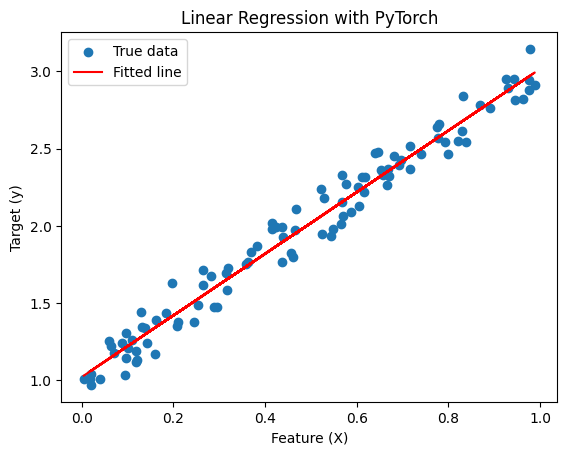

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic dataset (for example, a simple linear function y = 2x + 1)
np.random.seed(0)
torch.manual_seed(0)

X = np.random.rand(100, 1)  # 100 random points as features
y = 2 * X + 1 + np.random.normal(0, 0.1, (100, 1))  # y = 2x + 1 with some noise

# Convert the data to PyTorch tensors
X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

# Step 2: Define the model (simple linear regression with one feature)
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output (regression)

    def forward(self, x):
        return self.linear(x)

# Step 3: Instantiate the model
model = LinearRegressionModel()

# Step 4: Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Step 5: Define the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Step 6: Train the model
epochs = 1000
for epoch in range(epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(X_train)

    # Compute the loss (difference between predicted and actual y values)
    loss = criterion(y_pred, y_train)

    # Zero the gradients before backward pass
    optimizer.zero_grad()

    # Backward pass: Compute gradients of the loss w.r.t. model parameters
    loss.backward()

    # Update the model parameters
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Step 7: Plot the results
predicted = model(X_train).detach().numpy()

plt.scatter(X, y, label="True data")
plt.plot(X, predicted, color='r', label="Fitted line")
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression with PyTorch')
plt.legend()
plt.show()
